In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display   #for loading and visualizing audio files
import IPython.display as ipd   #to play audio

plt.style.use('ggplot')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import time 
import pickle

In [8]:
df_classifier1_0_100 = pd.read_csv('/Volumes/Extreme SSD/CAPSTONE_DATA/saved/final_dfs/df_classifier1_0_100_trim.csv',dtype = {'track_id':str, 'folder':str}, index_col=False) #loading csv
df_classifier1_0_100.drop(axis = 1, columns=['Unnamed: 0','level_0','index'],inplace =True)

## Unsupervised Learning Clustering

In [12]:
from scikitplot.metrics import plot_silhouette
from scikitplot.cluster import plot_elbow_curve
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler

Top 2 feature importance : 
1. H_max_1
2. H_std_1
5. P_min_2

    Subset 1 : Hip-Hop |  Classical |   Rock
    Subset 2 : Electronic |  Jazz |   Folk

In [10]:
subset1 = df_classifier1_0_100[df_classifier1_0_100.genres_top.isin(['Hip-Hop','Classical','Rock'])]

In [11]:
subset2 = df_classifier1_0_100[df_classifier1_0_100.genres_top.isin(['Pop','Jazz','Folk'])]

In [59]:
current_palette = sns.color_palette('brg_r')
first= current_palette[3]
second = current_palette[0]
third = current_palette[-1]
fourth = current_palette[4]

sns.set_palette([first, second, third, fourth])
sns.color_palette('brg_r')

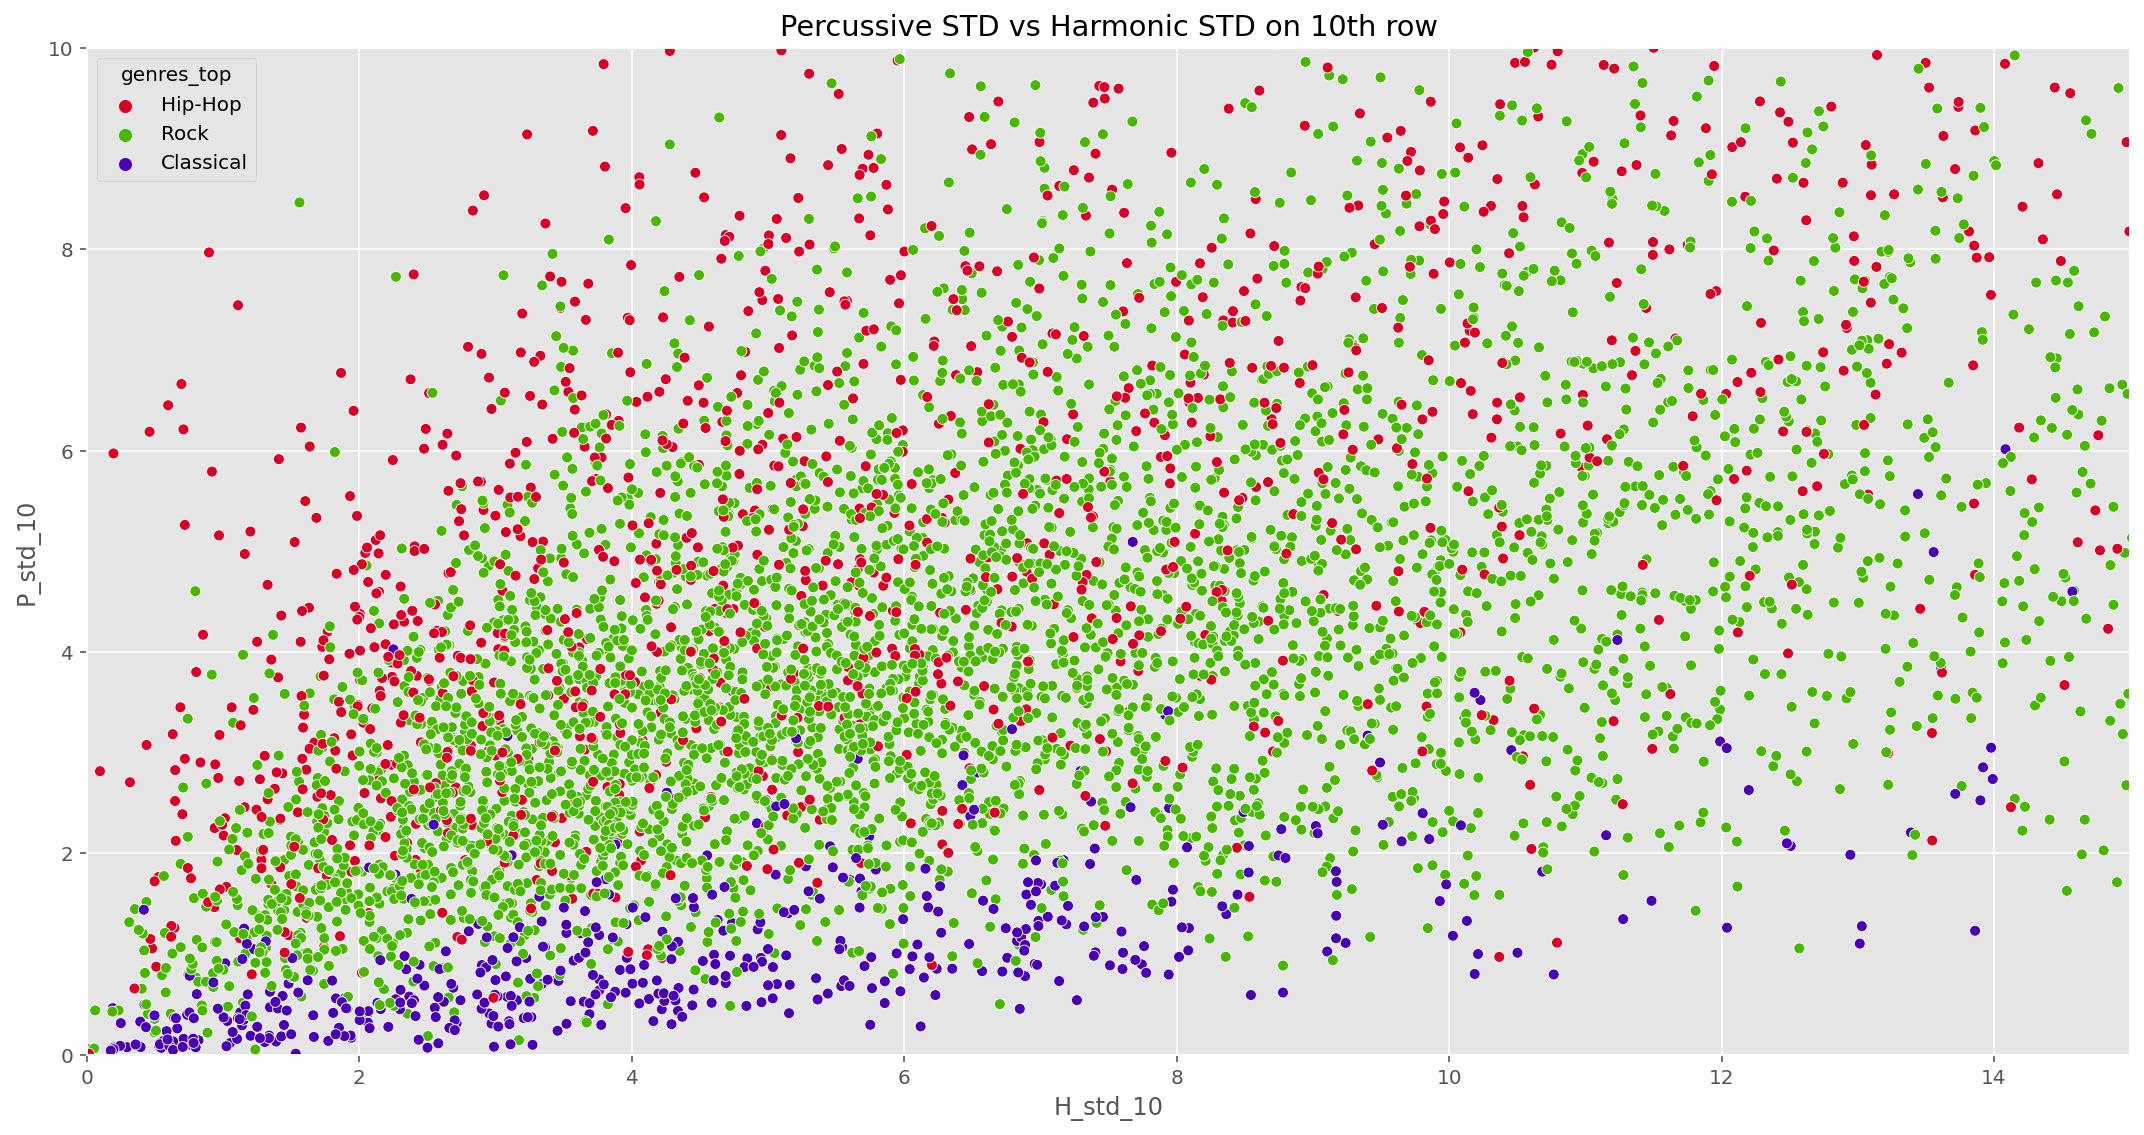

In [62]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(15,8))
sns.scatterplot(x = subset1.H_std_10, y= subset1.P_std_10, hue = subset1.genres_top,ax=ax, s = 30, 
                palette = sns.set_palette([first, second, third, fourth]))

ax.set_title("Percussive STD vs Harmonic STD on 10th row")
ax.set(ylim=(0, 10))
ax.set(xlim=(0, 15))
fig.tight_layout()
plt.show()

### Selecting Data

Only 2 columns

In [34]:
X = subset1[subset1.columns[5:]]
y = subset1.genres_top

min_max = MinMaxScaler()
X_std = min_max.fit_transform(X)

### KMeans Cluster

In [35]:
knn = KMeans(n_clusters=3, random_state=1)
knn.fit(X_std)

labels_knn = knn.labels_
np.unique(labels_knn)

array([0, 1, 2], dtype=int32)

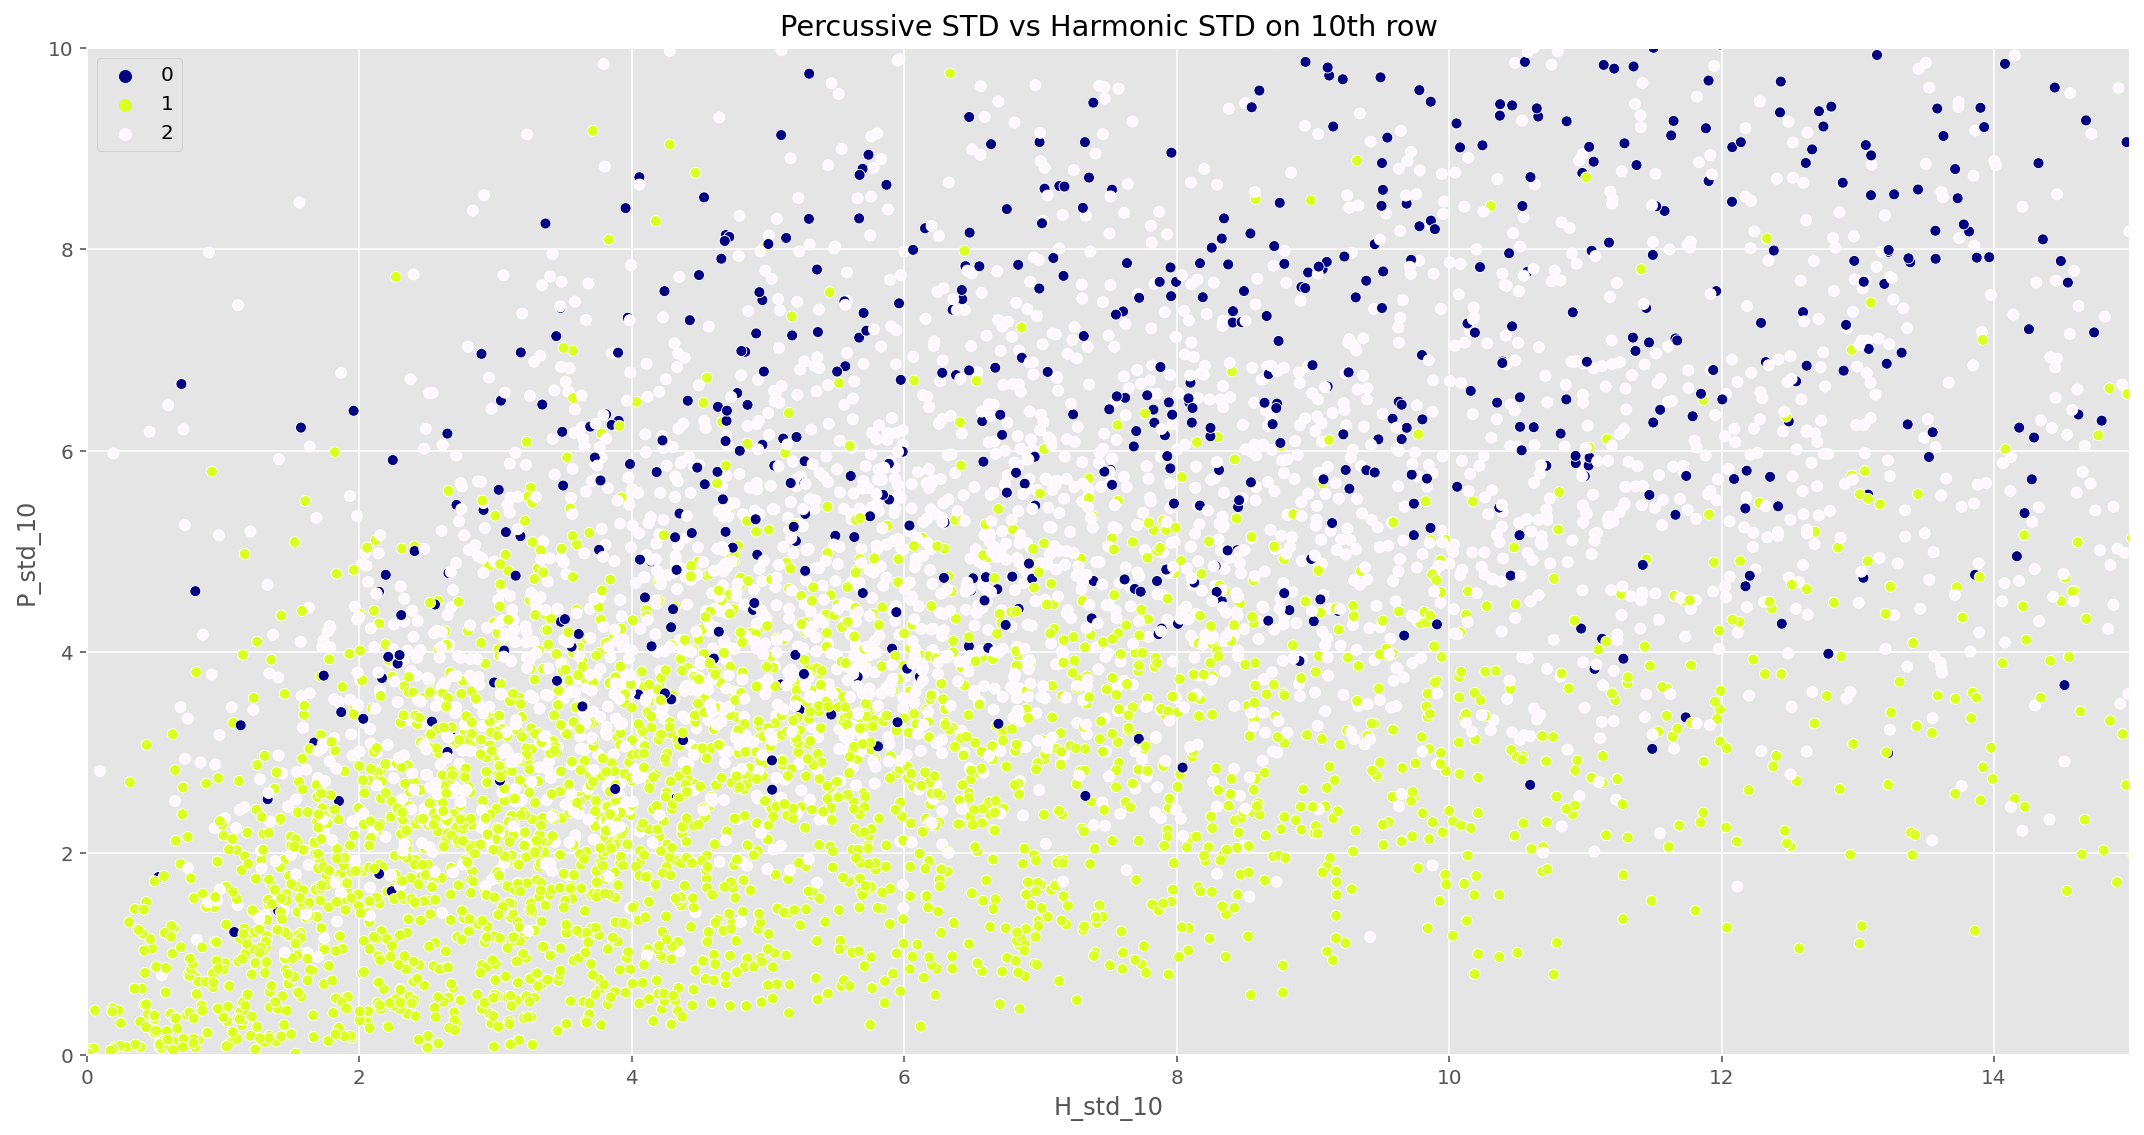

In [36]:
current_palette = sns.color_palette('gist_ncar')
first= current_palette[0]
second = current_palette[1]
third = current_palette[-1]
fourth = current_palette[4]
fifth = current_palette[5:]
#sns.color_palette('gist_ncar')

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(15,8))
sns.scatterplot(x = subset1.H_std_10, y= subset1.P_std_10, hue = labels_knn, size_order = [True,False],ax=ax, s = 30, 
                palette = 'gist_ncar')

ax.set_title("Percussive STD vs Harmonic STD on 10th row")
ax.set(ylim=(0, 10))
ax.set(xlim=(0, 15))
fig.tight_layout()
plt.show()

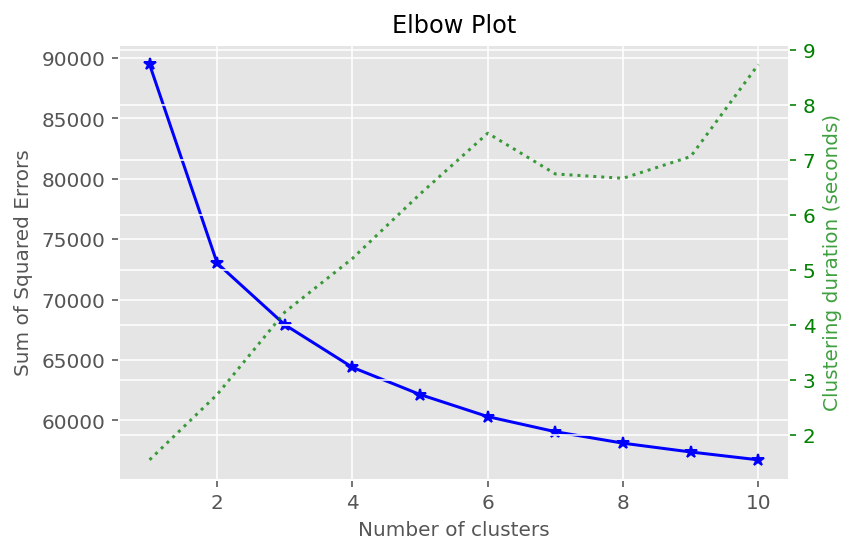

In [37]:
plot_elbow_curve(knn, X_std, cluster_ranges=range(1, 11))
plt.show()

100%|██████████| 4/4 [00:08<00:00,  2.11s/it]


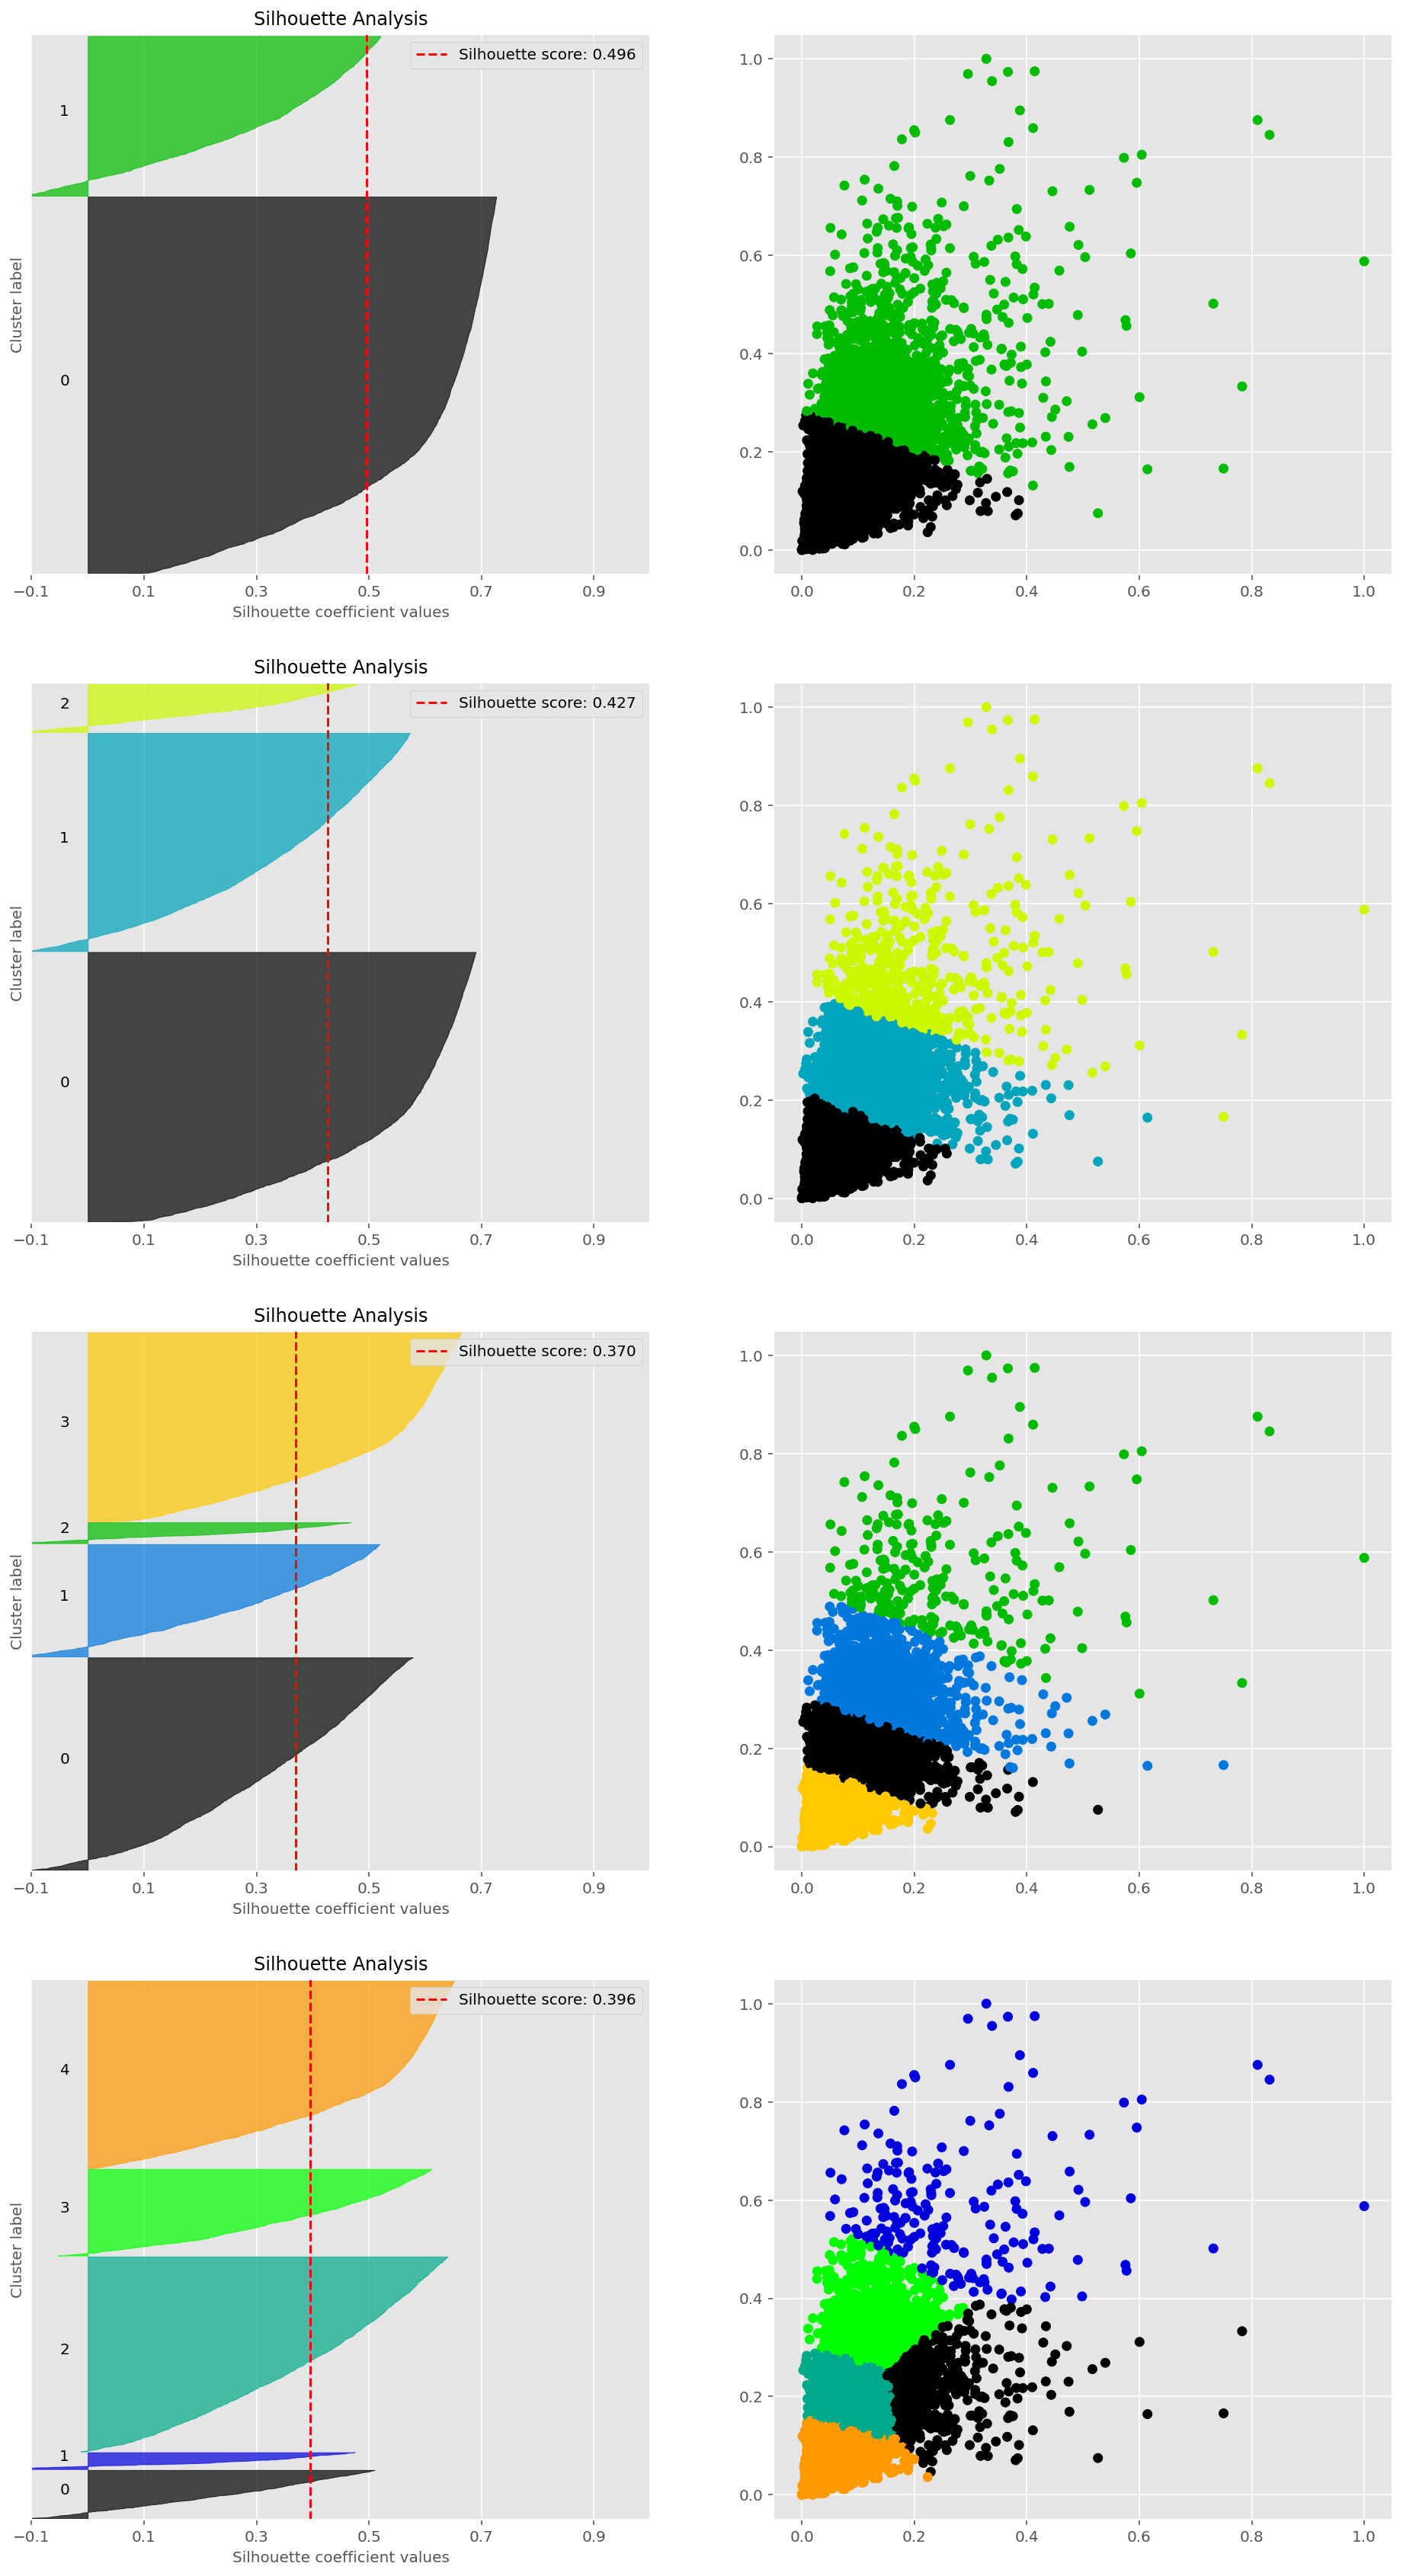

In [20]:
silhouette = []

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(16, 30))

for k in tqdm(range(2, 6)):

    model = KMeans(n_clusters=k, random_state=1)
    labels = model.fit_predict(X_std)
    silhouette.append((k, silhouette_score(X_std, labels)))

    colors = cm.nipy_spectral(labels.astype(float) / k)
    plot_silhouette(X_std, labels, ax=ax[k-2, 0])
    ax[k-2, 1].scatter(X_std[:, 0], X_std[:, 1], color=colors)

silhouette = np.array(silhouette)

### DBScan Cluster

In [71]:
dbscan = DBSCAN(eps=0.1, min_samples=2) 
dbscan.fit(X_std)
labels_db = dbscan.labels_
np.unique(labels_db)

array([-1])

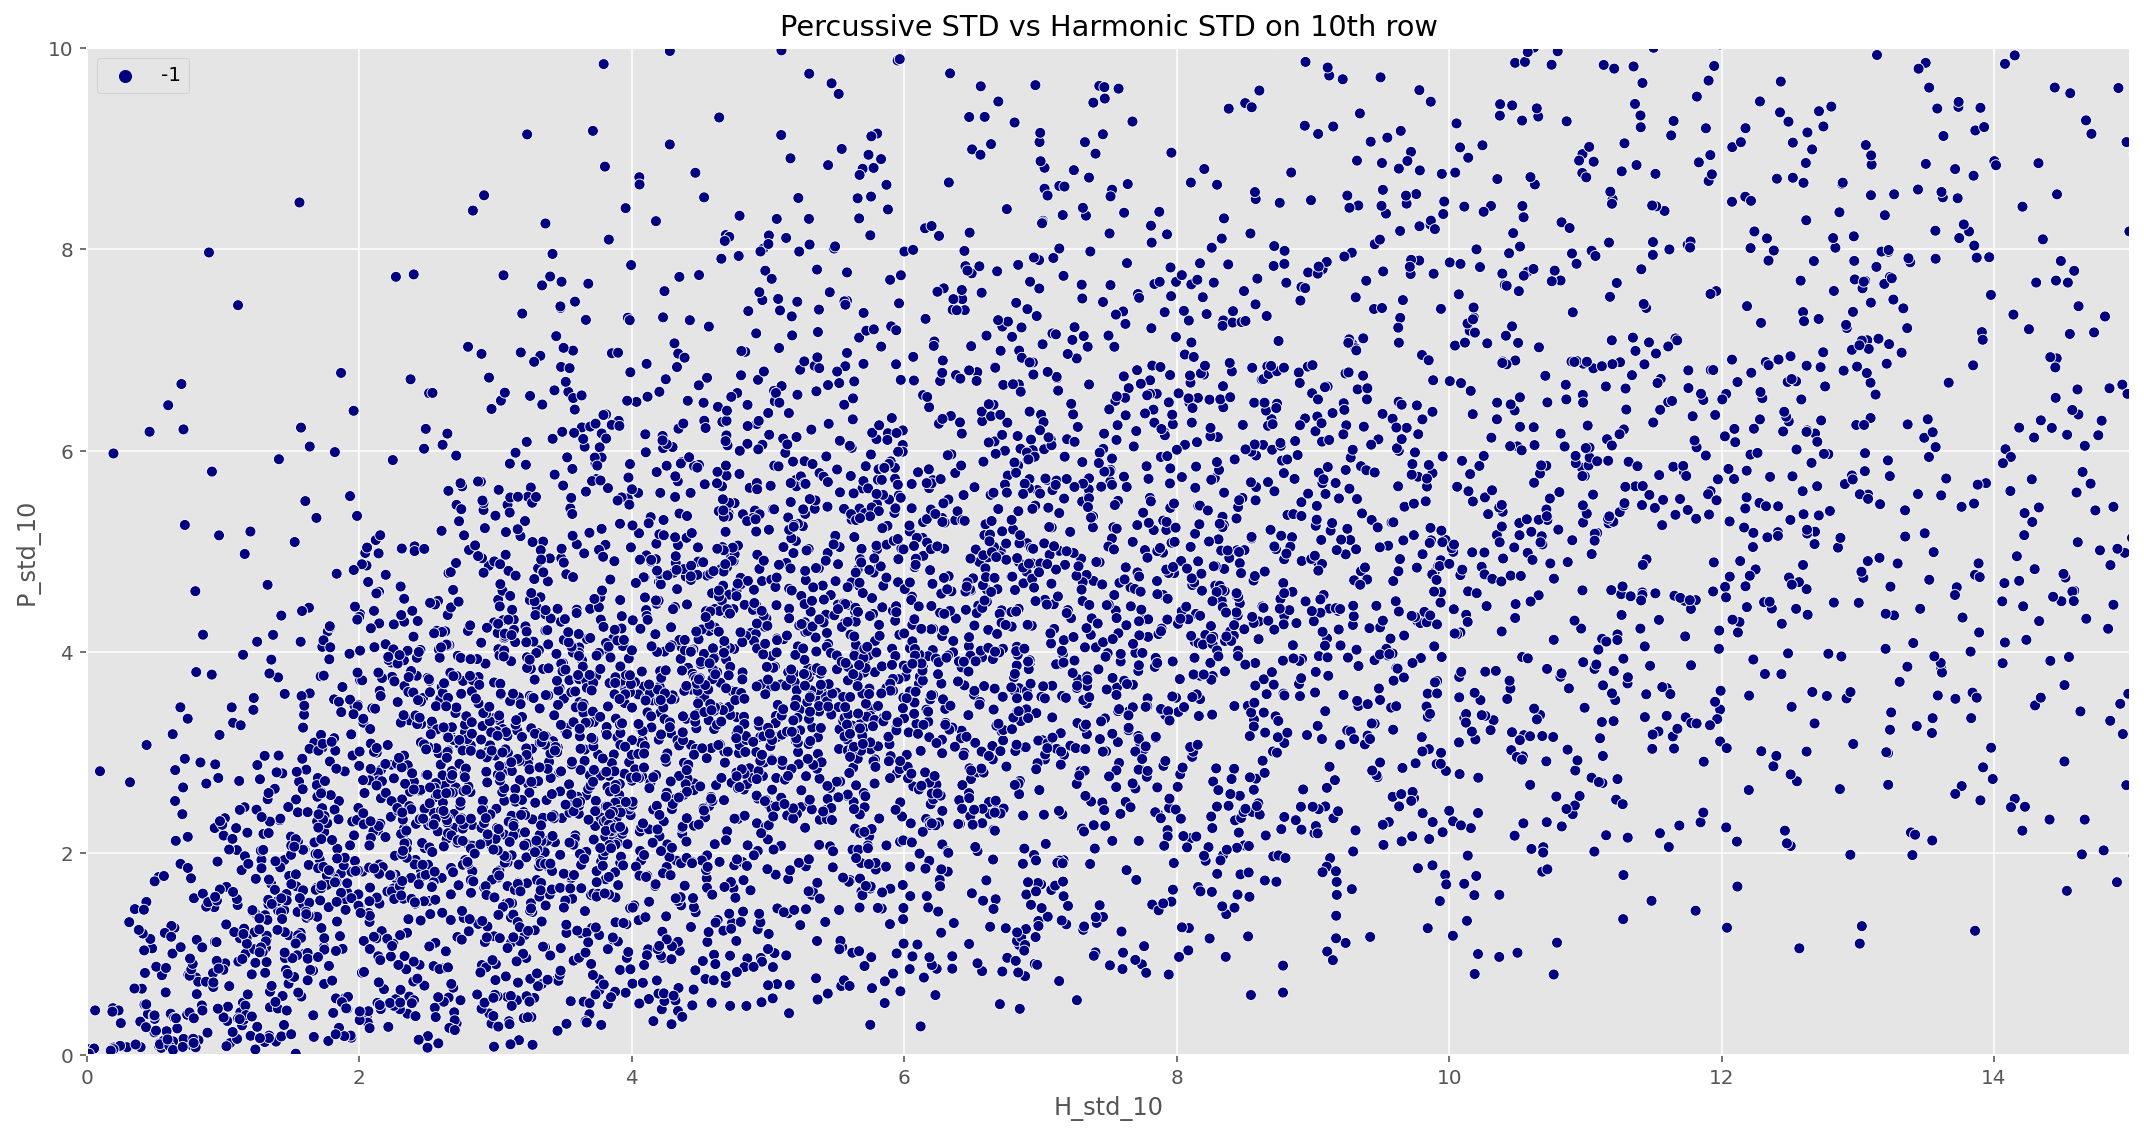

In [72]:
current_palette = sns.color_palette('gist_ncar')
first= current_palette[0]
second = current_palette[1]
third = current_palette[-1]
fourth = current_palette[4]
fifth = current_palette[5:]
#sns.color_palette('gist_ncar')

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(15,8))
sns.scatterplot(x = subset1.H_std_10, y= subset1.P_std_10, hue = labels_db, size_order = [True,False],ax=ax, s = 30, 
                palette = 'gist_ncar')

ax.set_title("Percussive STD vs Harmonic STD on 10th row")
ax.set(ylim=(0, 10))
ax.set(xlim=(0, 15))
fig.tight_layout()
plt.show()

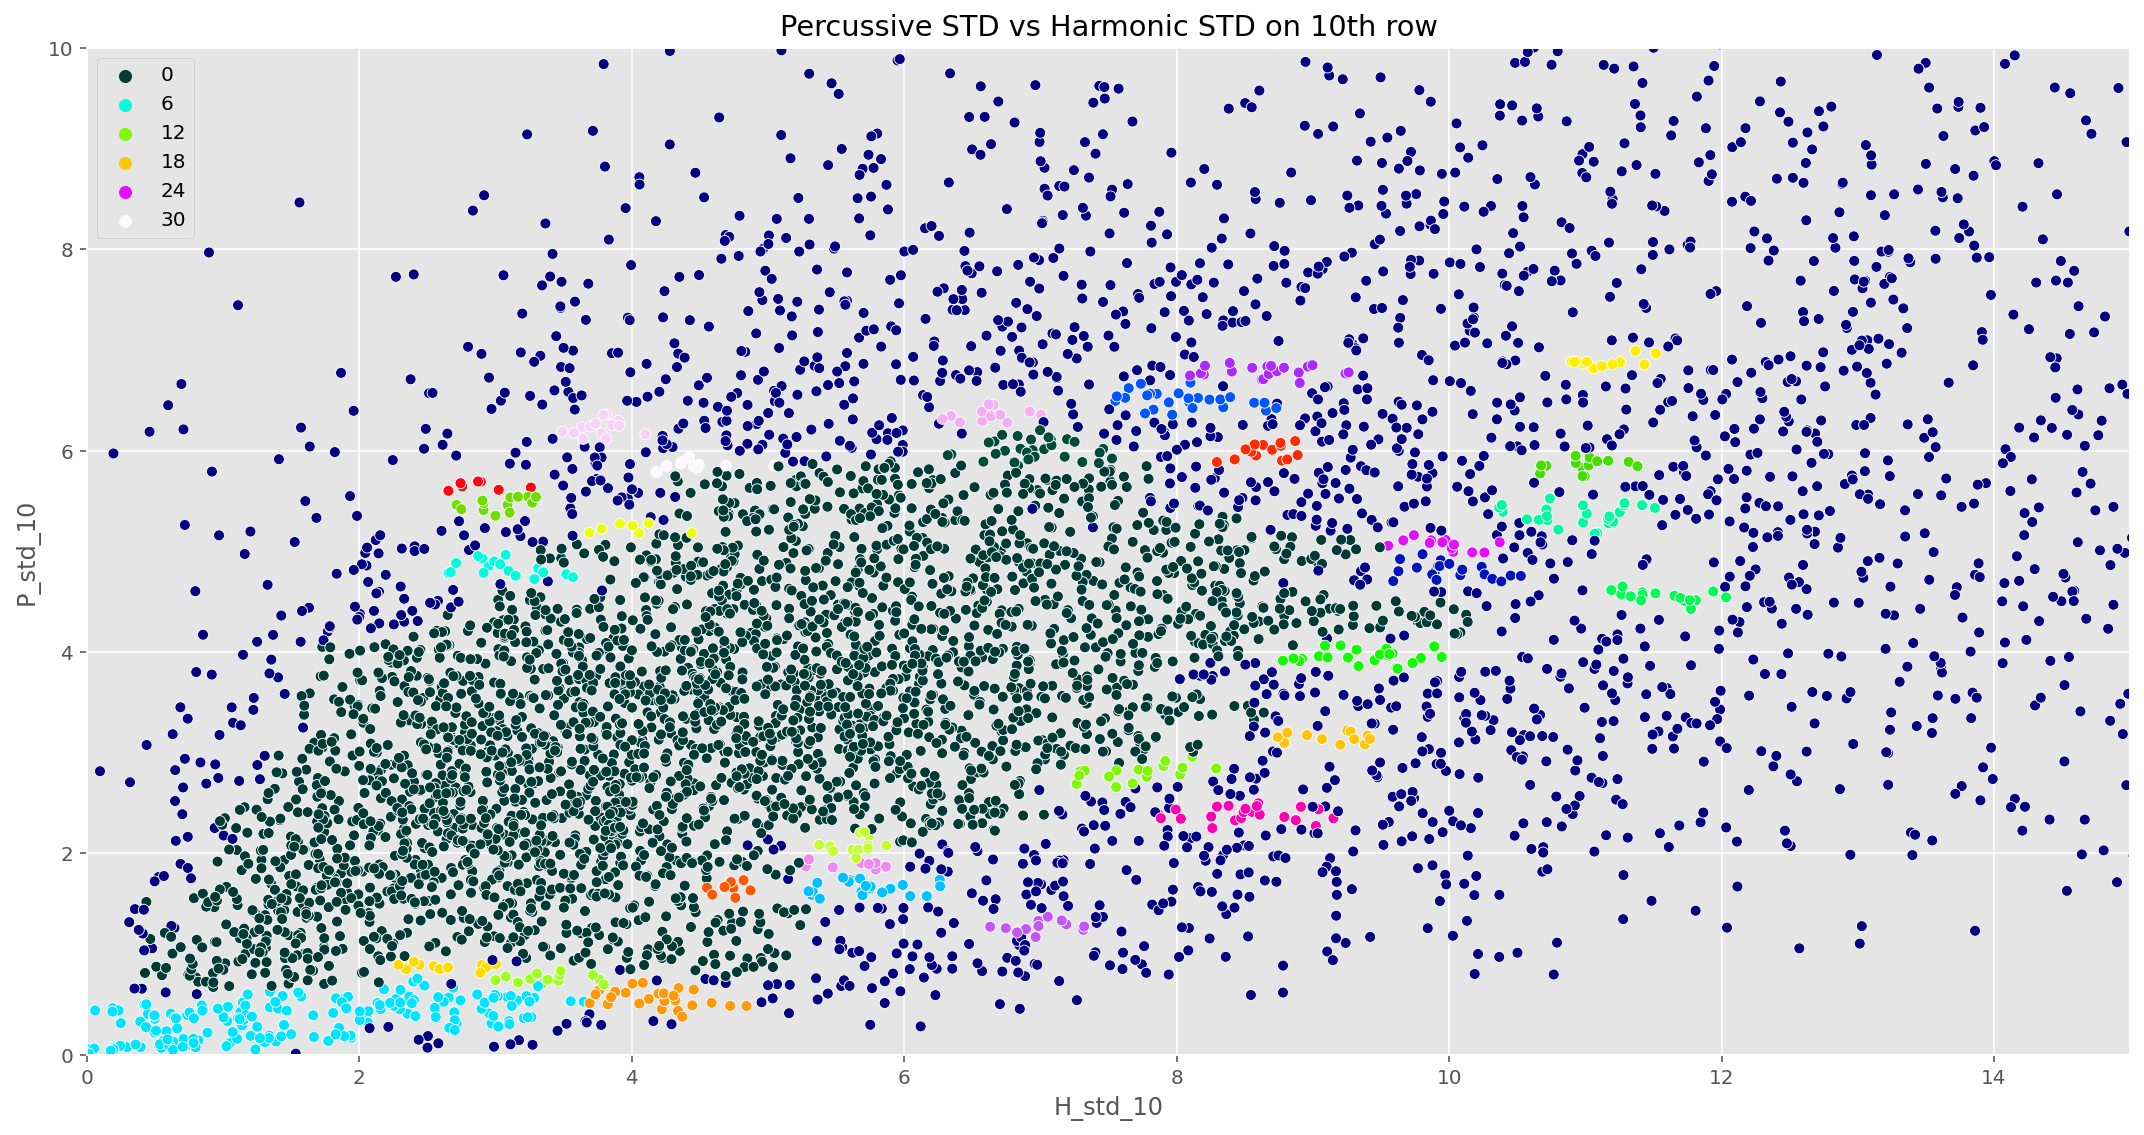

In [25]:
current_palette = sns.color_palette('gist_ncar')
first= current_palette[0]
second = current_palette[1]
third = current_palette[-1]
fourth = current_palette[4]
fifth = current_palette[5:]
#sns.color_palette('gist_ncar')

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(15,8))
sns.scatterplot(x = subset1.H_std_10, y= subset1.P_std_10, hue = labels_db, size_order = [True,False],ax=ax, s = 30, 
                palette = 'gist_ncar')

ax.set_title("Percussive STD vs Harmonic STD on 10th row")
ax.set(ylim=(0, 10))
ax.set(xlim=(0, 15))
fig.tight_layout()
plt.show()

Subset2

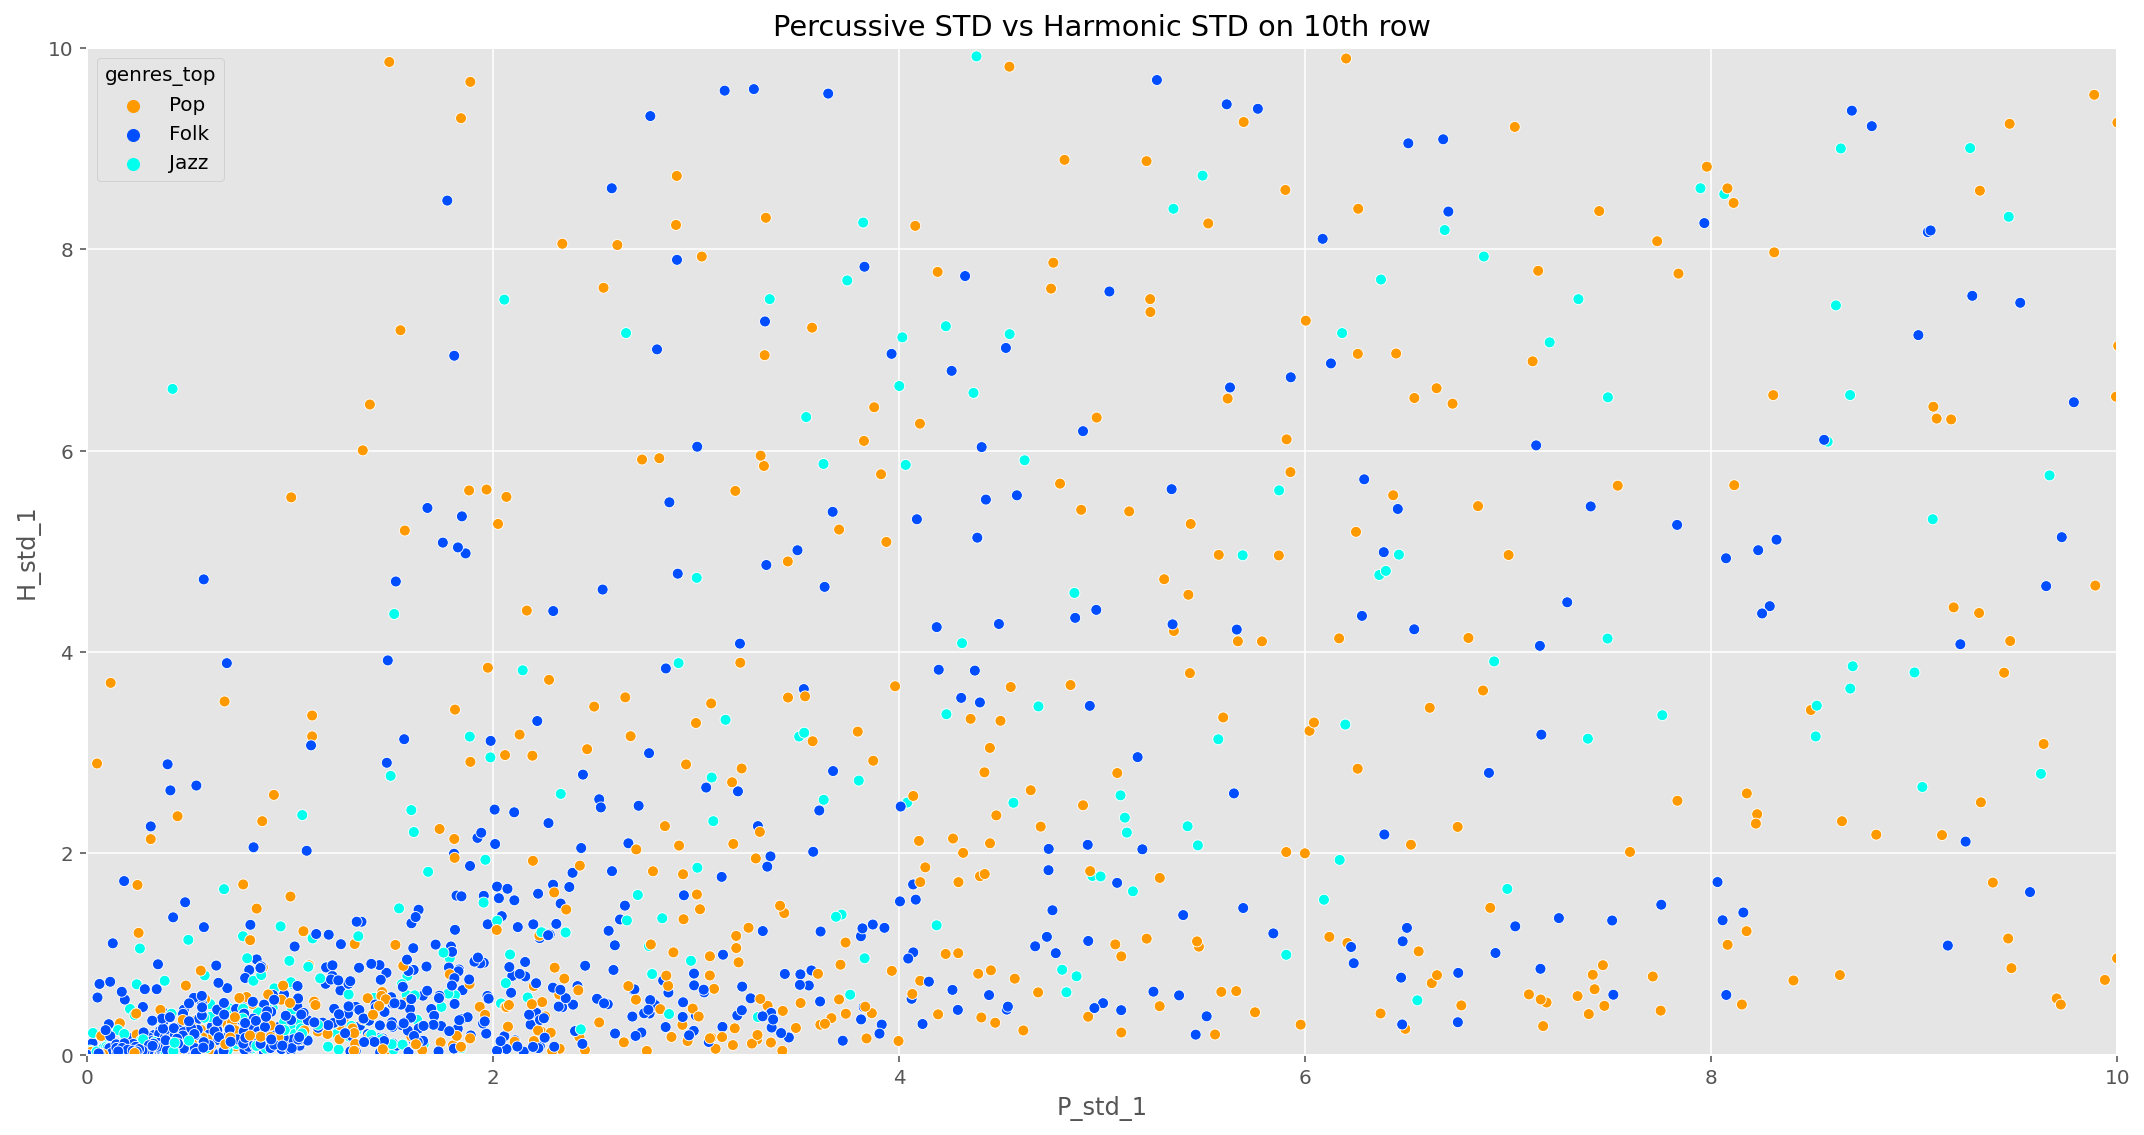

In [108]:
current_palette = sns.color_palette('gist_rainbow')
first= current_palette[0]
second = current_palette[4]
third = current_palette[3]
fourth = current_palette[-1]
sns.color_palette('gist_ncar')

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(15,8))
sns.scatterplot(x = subset2.P_std_1, y= subset2.H_std_1, hue = subset2.genres_top,ax=ax, s = 30, 
                palette = sns.set_palette([first, second, third, fourth]))

ax.set_title("Percussive STD vs Harmonic STD on 10th row")
#ax.set(ylim=(0, 25))
#ax.set(xlim=(0, 100))
ax.set(ylim=(0, 10))
ax.set(xlim=(0, 10))
fig.tight_layout()
plt.show()

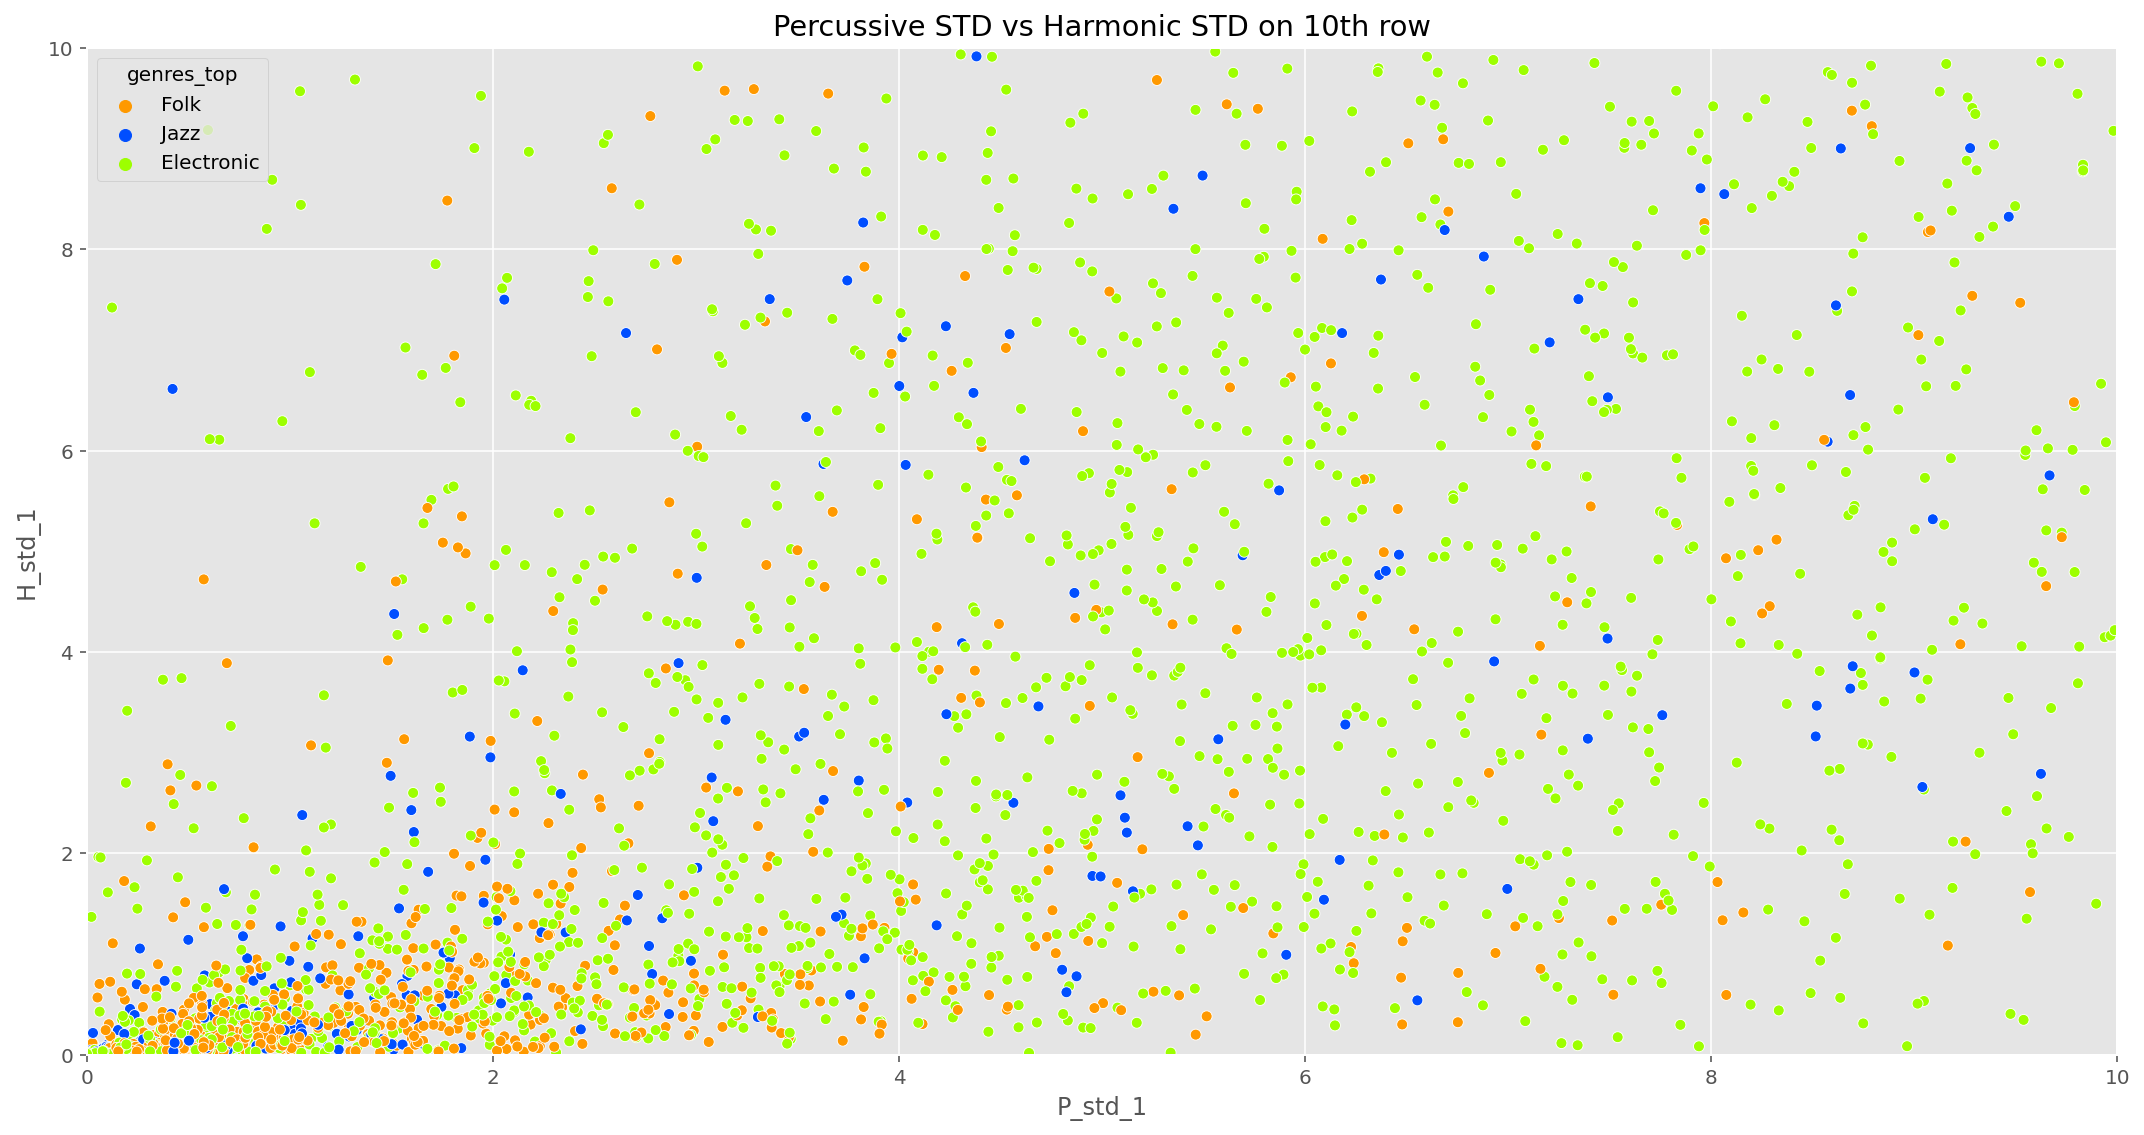

In [103]:
current_palette = sns.color_palette('gist_rainbow')
first= current_palette[0]
second = current_palette[4]
third = current_palette[1]
fourth = current_palette[-1]
sns.color_palette('gist_ncar')

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(15,8))
sns.scatterplot(x = subset2.P_std_1, y= subset2.H_std_1, hue = subset2.genres_top,ax=ax, s = 30, 
                palette = sns.set_palette([first, second, third, fourth]))

ax.set_title("Percussive STD vs Harmonic STD on 10th row")
#ax.set(ylim=(0, 25))
#ax.set(xlim=(0, 100))
ax.set(ylim=(0, 10))
ax.set(xlim=(0, 10))
fig.tight_layout()
plt.show()